In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
data=pd.read_csv("bank.csv")

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])


X = data.drop('deposit', axis=1)  
y = data['deposit']               
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_model = LogisticRegression(solver='liblinear', max_iter=200)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Doğruluk Oranı:", logistic_accuracy)
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Doğruluk Oranı: 0.7890729959695477
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1166
           1       0.79      0.76      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



In [49]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Doğruluk Oranı:", tree_accuracy)
print(classification_report(y_test, y_pred_tree))


Decision Tree Doğruluk Oranı: 0.7630989699955217
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1166
           1       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



In [51]:
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)


y_pred_forest = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred_forest)
print("Random Forest Doğruluk Oranı:", forest_accuracy)
print(classification_report(y_test, y_pred_forest))


Random Forest Doğruluk Oranı: 0.8334079713390058
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



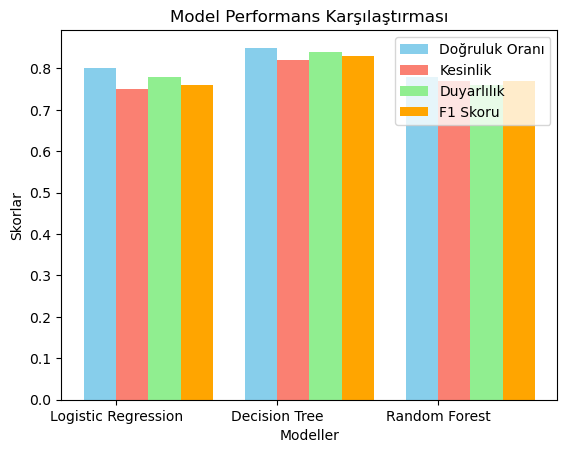

In [52]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [0.8, 0.85, 0.78]
precision_scores = [0.75, 0.82, 0.77]
recall_scores = [0.78, 0.84, 0.76]
f1_scores = [0.76, 0.83, 0.77]

x = np.arange(len(models))
width = 0.2 

plt.bar(x, accuracy_scores, width, label='Doğruluk Oranı', color='skyblue')
plt.bar(x + width, precision_scores, width, label='Kesinlik', color='salmon')
plt.bar(x + 2 * width, recall_scores, width, label='Duyarlılık', color='lightgreen')
plt.bar(x + 3 * width, f1_scores, width, label='F1 Skoru', color='orange')

plt.xlabel('Modeller')
plt.ylabel('Skorlar')
plt.title('Model Performans Karşılaştırması')
plt.xticks(x + width / 2, models)  # X eksenindeki etiketleri ortala
plt.legend()
plt.show()
